# Analisis de los datos

## Importaciones

In [48]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./data/train.csv')

## Analisis rápido de los datos

In [36]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
train.shape

(200000, 202)

In [65]:
integer_columns = train.select_dtypes(include=['int64']).columns 
float_columns = train.select_dtypes(include=['float64']).columns 
object_columns = train.select_dtypes(include=['object']).columns 
print('El número de columnas enteras es:', len(integer_columns))
print('El número de columnas float es:', len(float_columns))
print('El número de columnas object es:', len(object_columns))

El número de columnas enteras es: 1
El número de columnas float es: 200
El número de columnas object es: 1


Todas las columnas del dataframe son numéricas con la única exepción de la columna 'ID_code', que se va a usar de index

In [44]:
train.set_index('ID_code').head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


El porcentaje de 1 en el targes es: 0.89951
El porcentaje de 0 en el targes es: 0.10049


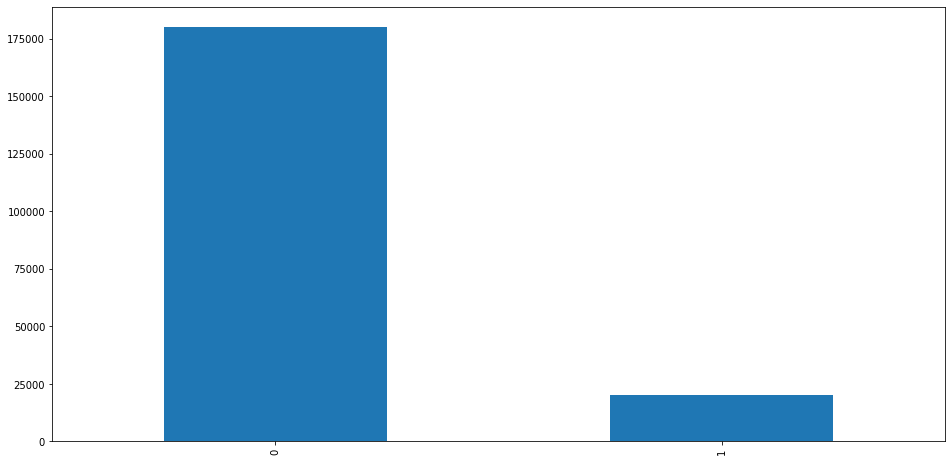

In [43]:
train.target.value_counts().plot(kind='bar', figsize=(16,8));
print('El porcentaje de 1 en el targes es:', list(train.target.value_counts())[0]/train.shape[0])
print('El porcentaje de 0 en el targes es:', list(train.target.value_counts())[1]/train.shape[0])

Hay una mayor cantidad de 0 que de 1 en la columna de target, esto va a generar un sesgo en las predicciones, por lo que va a tener que remediarse

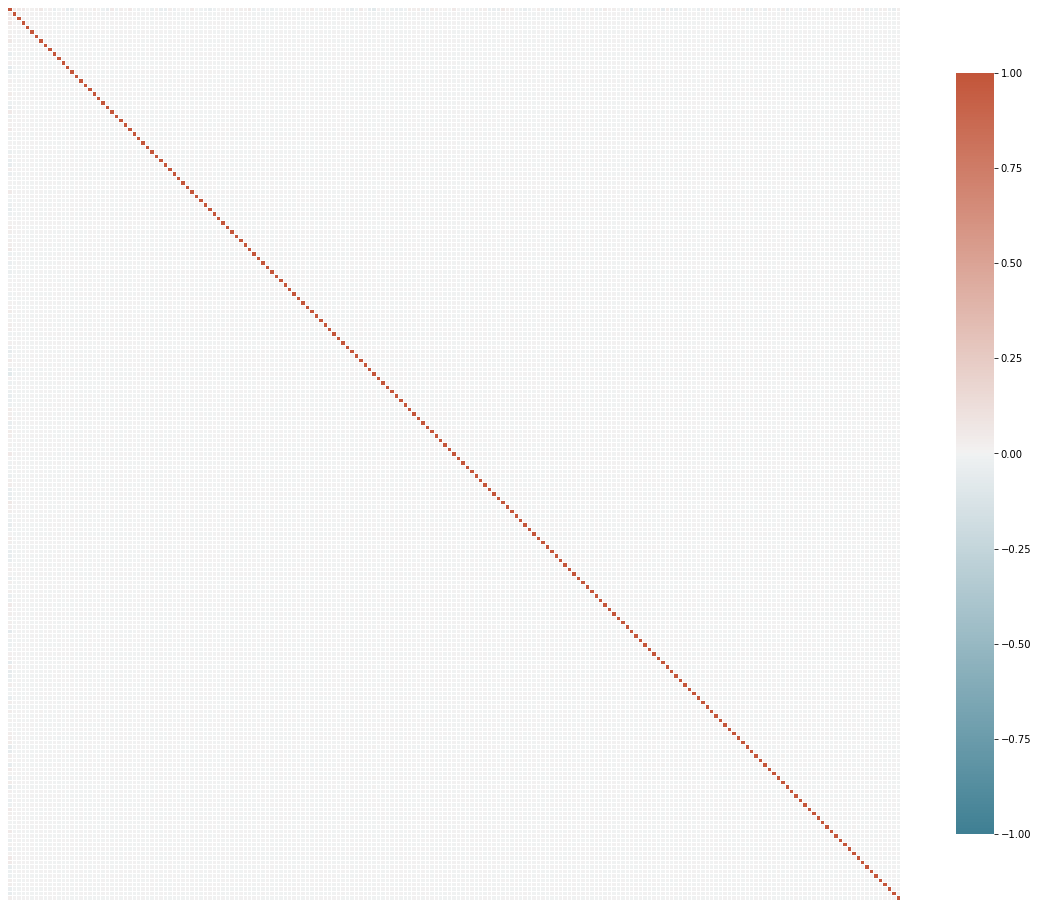

In [52]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(train.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=False,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=False,
            yticklabels=False
);

Se comprueba que no hay correlacion entre columnas